In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())


Saving Salary_Data_Tugas EDA.xlsx to Salary_Data_Tugas EDA.xlsx


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [2]:
print("ukuran dataset (baris, kolom):", df.shape)

ukuran dataset (baris, kolom): (6707, 6)


In [3]:
print("jumlah total elemen:", df.size)

jumlah total elemen: 40242


In [4]:
print(df.dtypes)

Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [5]:
print("jumlah nilai yang hilang")
df.isnull().sum()

jumlah nilai yang hilang


,0
Age,0
Gender,0
Education Level,1
Job Title,1
Years of Experience,2
Salary,4


In [6]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


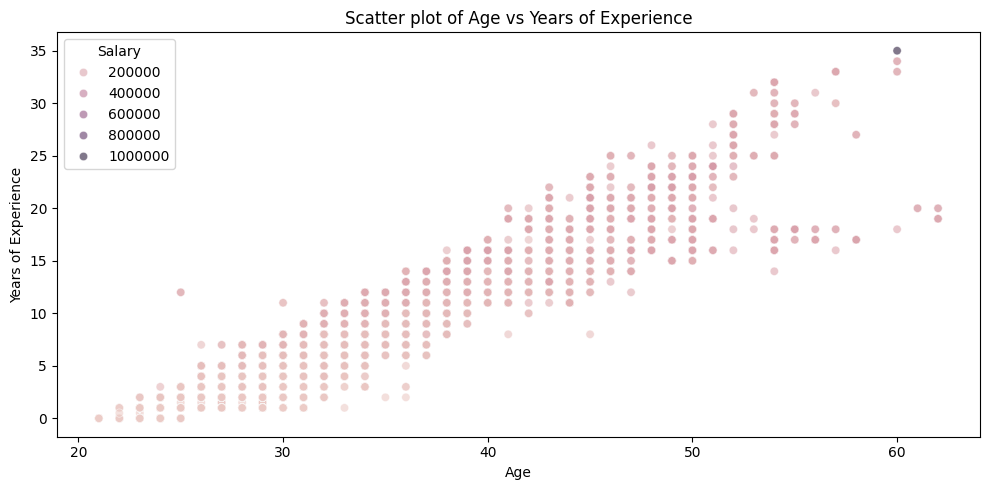

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh Visualisasi hubungan antar dua kolom numerik (Scatter Plot)
# Kita bisa memilih kolom yang relevan
numerical_cols_scatter = ['Age', 'Years of Experience']
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue='Salary', alpha=0.6)
plt.title(f'Scatter plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

In [8]:
print("\nInformasi tentang DataFrame:")
df.info()


Informasi tentang DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 1 to 6707
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB


In [9]:
print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())


Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [10]:
el_mode = df['Education Level'].mode()[0]
jt_mode = df['Job Title'].mode()[0]
yoe_mode = df['Years of Experience'].mode()[0]
s_mode = df['Salary'].mode()[0]
print(f"Modus dari kolom 'Education Level': {el_mode}")
print(f"Modus dari kolom 'Job Title': {jt_mode}")
print(f"Modus dari kolom 'Years of Experience': {yoe_mode}")
print(f"Modus dari kolom 'Salary': {s_mode}")

# Mengisi nilai yang hilang di kolom 'Status' dengan modus
df['Education Level'] = df['Education Level'].fillna(el_mode)
df['Job Title'] = df['Job Title'].fillna(jt_mode)
df['Years of Experience'] = df['Years of Experience'].fillna(yoe_mode)
df['Salary'] = df['Salary'].fillna(s_mode)

print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Modus dari kolom 'Education Level': Bachelor's Degree
Modus dari kolom 'Job Title': Software Engineer
Modus dari kolom 'Years of Experience': 2.0
Modus dari kolom 'Salary': 140000.0

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [13]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada lagi baris duplikat
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan duplikat
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama DataFrame setelah penghapusan duplikat:")
    display(df.head())

Jumlah baris duplikat: 4913

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan duplikat:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,2.0,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [14]:
# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())


Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    509
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1794.000000,1794.000000,1794.000000
mean,35.140468,9.154125,113726.860089
std,8.232829,6.866614,55647.459021
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110353.500000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


In [15]:
# Standardisasi kolom 'Job Title'
df['Job Title'] = df['Job Title'].str.lower().str.strip()

# Verifikasi setelah standardisasi
print("\nDistribusi kolom 'Job Title' setelah standardisasi:")
print(df['Job Title'].value_counts())


Distribusi kolom 'Job Title' setelah standardisasi:
Job Title
software engineer manager    127
full stack engineer          123
senior software engineer      96
senior project engineer       95
back end developer            81
                            ... 
developer                      1
social m                       1
social media man               1
delivery driver                1
intern                         1
Name: count, Length: 193, dtype: int64


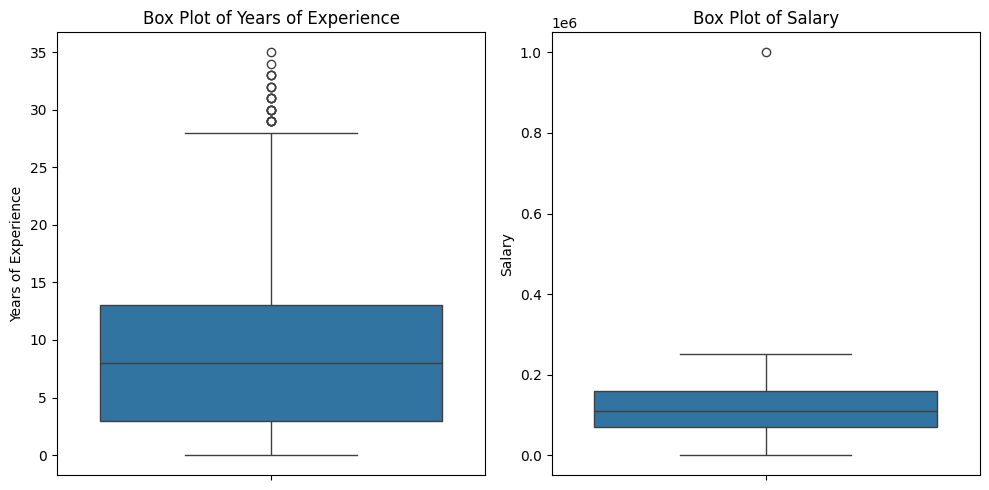

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi kolom numerik untuk mendeteksi outlier (Box Plot)
numerical_cols_outliers = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


Statistik deskriptif untuk 'Salary' setelah capping (upper limit = 20000000):


,Salary
count,1794.000000
mean,113726.860089
std,55647.459021
min,350.000000
25%,70000.000000
50%,110353.500000
75%,160000.000000
max,1000000.000000


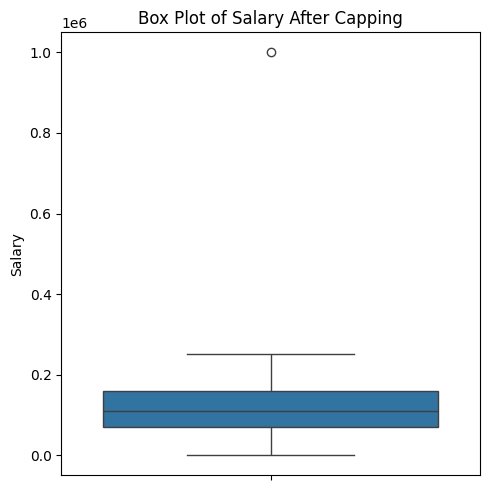

In [17]:
upper_limit = 20000000
df['Salary'] = df['Salary'].clip(upper=upper_limit)

print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper limit = {upper_limit}):")
display(df['Salary'].describe())

# Visualisasi 'Pendapatan' setelah capping (Box Plot)
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary After Capping')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


In [18]:
df = df.reset_index(drop=True)
df.index = df.index + 1
display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,software engineer,5.0,90000.0
2,28,Female,Master's,data analyst,3.0,65000.0
3,45,Male,PhD,senior manager,2.0,150000.0
4,36,Female,Bachelor's,sales associate,7.0,60000.0
5,52,Male,Master's,director,20.0,200000.0


In [23]:
# menampilkan korelasi antara years of experience dan salary
correlation = df['Years of Experience'].corr(df['Salary'])
print(f"Korelasi antara 'Years of Experience' dan 'Salary': {correlation}")

# hitung koefisien determinasi (R-squared)
r_squared = correlation**2
print(f"koefisien determinasi (R-squared) antara years of experience dan salary: {r_squared}")

Korelasi antara 'Years of Experience' dan 'Salary': 0.7868515060756013
koefisien determinasi (R-squared) antara years of experience dan salary: 0.619135292613442


In [28]:
# Rename the column to remove the space
df = df.rename(columns={'Years of Experience': 'Years_of_Experience'})

# Verify the column name has been changed
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years_of_Experience',
       'Salary'],
      dtype='object')


In [33]:
import statsmodels.formula.api as smf
# definisikan dan sesuaikan model regresi years of experience vs salary
model_yoe_salary = smf.ols('Years_of_Experience ~ Salary', data=df).fit()

# mengambil koefisien dari model regresi years of experience vs salary
intercept_yoe_salary = model_yoe_salary.params['Intercept']
yoe_coef_yoe_salary = model_yoe_salary.params['Salary']

# mengambil jumlah kuadrat residual (ssr) dari model baru
ssr_yoe_salary = model_yoe_salary.ssr

# tampilkan ringkasan model
print(f"jumlah kuadrat residual (ssr) untuk model years of experience vs salary: {ssr_yoe_salary:.4f}")
print(f"persamaan garis regresi (years of experience vs salary):")
print(f"Years of Experience prediksi = {intercept_yoe_salary:.4f} + {yoe_coef_yoe_salary:.4f} * Years_of_Experience")

jumlah kuadrat residual (ssr) untuk model years of experience vs salary: 32198.5440
persamaan garis regresi (years of experience vs salary):
Years of Experience prediksi = -1.8880 + 0.0001 * Years_of_Experience


Hasil Uji Shapiro-Wilk: statistik = 0.8801, p-value = 0.0000
Data tidak berdistribusi normal (menolak H0)


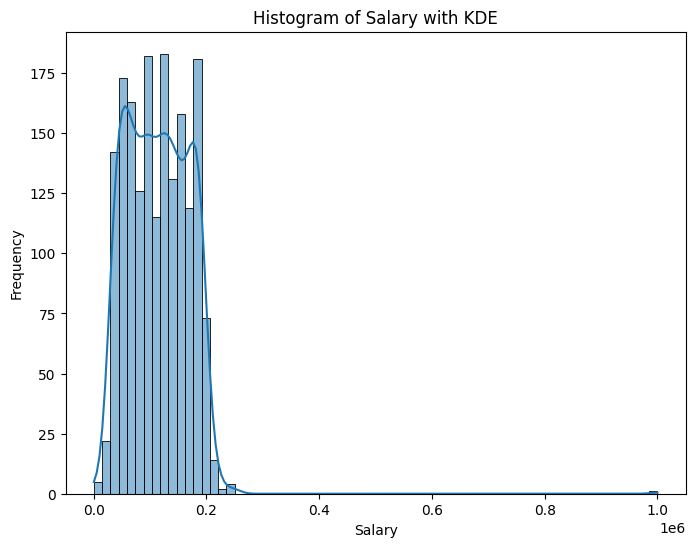

In [34]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test = stats.shapiro(df['Salary'])
print(f"Hasil Uji Shapiro-Wilk: statistik = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
    print("Data tidak berdistribusi normal (menolak H0)")

plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title("Histogram of Salary with KDE")
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
